In [2]:
# 加载数据并格式化
from keras.datasets import boston_housing as housing
(train_data,train_tar),(test_data,test_tar) = housing.load_data() # (,13)
# 训练数据标准化
mean = train_data.mean(axis = 0)
train_data -= mean # 减平均值
std = train_data.std(axis = 0)
train_data /= std # 除标准差
# 测试数据标准化
test_data -= mean
test_data /= std


Using TensorFlow backend.


In [3]:
# 搭建网络
from keras import models
from keras import layers

def buildModel():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(13, )))
    model.add(layers.Dense(64, activation = 'relu',))
    model.add(layers.Dense(1, ))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


In [7]:
# 多个分区验证模型精度   适合少样本 K折训练法
import numpy as np
k = 4
every = len(train_data) // k
e = 500
all_his = []
for i in range(k):
    print("现在是  ",i)
    val_data = train_data[i*every : (i+1)*every]
    val_tar = train_tar[i*every : (i+1)*every]
    
    train_to_data = np.concatenate([train_data[:i*every],train_data[(i+1)*every:]],axis=0)
    train_to_tar = np.concatenate([train_tar[:i*every],train_tar[(i+1)*every:]],axis=0)
    
    model = buildModel()
    his = model.fit(train_to_data,train_to_tar,epochs = e, batch_size=8, verbose=0,validation_data=(val_data,val_tar))
    val_his = his.history['val_mean_absolute_error']
    all_his.append(val_his)


现在是   0
现在是   1
现在是   2
现在是   3


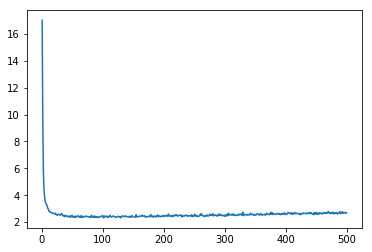

In [8]:
#绘图
import matplotlib.pyplot as plt
ave_his = [np.mean([x[i] for x in all_his]) for i in range(e)]
%matplotlib inline
plt.plot(range(1,len(ave_his)+1),ave_his)
plt.show()

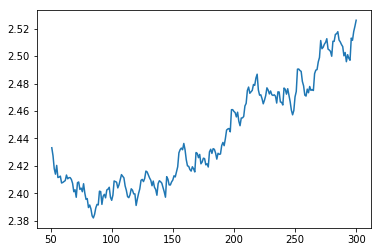

In [12]:
# 另一种绘图（绘制与前面的状态的差距）
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_ave_his = smooth_curve(ave_his[10:])
plt.plot(range(51,301),smooth_ave_his[50:300])
plt.show()

In [13]:
# 最终模型
model = buildModel()
model.fit(train_data,train_tar,epochs = 80,batch_size = 8)
print(model.evaluate(test_data,test_tar))

Epoch 1/80
404/404 [==============================] - 0s 919us/step - loss: 421.3497 - mean_absolute_error: 18.3985
Epoch 2/80
404/404 [==============================] - 0s 418us/step - loss: 137.3866 - mean_absolute_error: 9.0226
Epoch 3/80
404/404 [==============================] - 0s 374us/step - loss: 46.9460 - mean_absolute_error: 5.0032
Epoch 4/80
404/404 [==============================] - 0s 281us/step - loss: 29.4327 - mean_absolute_error: 3.8641
Epoch 5/80
404/404 [==============================] - 0s 271us/step - loss: 23.3680 - mean_absolute_error: 3.3689
Epoch 6/80
404/404 [==============================] - 0s 282us/step - loss: 19.9666 - mean_absolute_error: 3.1078
Epoch 7/80
404/404 [==============================] - 0s 320us/step - loss: 17.5720 - mean_absolute_error: 2.9195
Epoch 8/80
404/404 [==============================] - 0s 295us/step - loss: 15.8635 - mean_absolute_error: 2.7592
Epoch 9/80
404/404 [==============================] - 0s 287us/step - loss: 14.6148 -